pre-process the inbuilt dataset and hence apply partition clustering algorithms and interpret the results.

One popular alternative is the DBSCAN (Density-Based Spatial Clustering of Applications with Noise) algorithm.

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score



In [2]:
# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data  # Features
y = iris.target  # Target variable



In [3]:
# Preprocessing - Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



In [4]:
# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(X_scaled)
dbscan_labels = dbscan.labels_



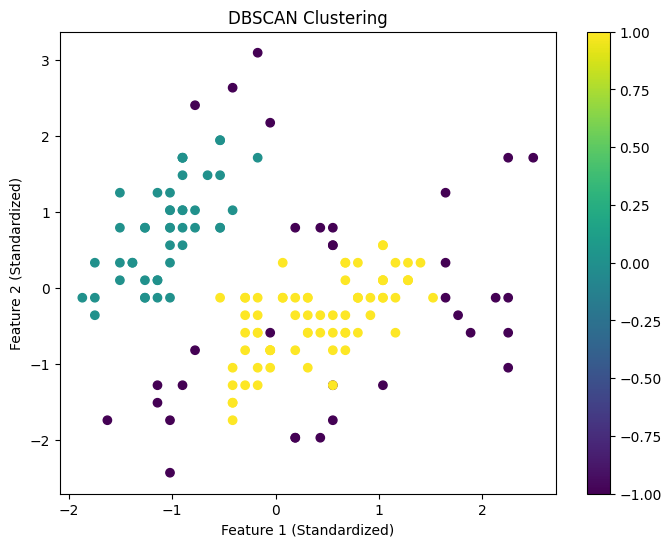

In [5]:
# Visualize the clusters (considering only the first two features for simplicity)
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=dbscan_labels, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1 (Standardized)')
plt.ylabel('Feature 2 (Standardized)')
plt.colorbar()
plt.show()



In [6]:
# Silhouette Score
silhouette_dbscan = silhouette_score(X_scaled, dbscan_labels)
print("Silhouette Score (DBSCAN):", silhouette_dbscan)


Silhouette Score (DBSCAN): 0.35651648142700726


Interpretation of the results:

DBSCAN Clustering: DBSCAN is a density-based clustering algorithm that groups together points that are closely packed together, marking as outliers points that lie alone in low-density regions. In the visualization, points of the same color belong to the same cluster according to the DBSCAN algorithm. Unlike K-Means or K-Medoids, DBSCAN doesn't require specifying the number of clusters beforehand. Instead, it relies on two parameters: eps (the maximum distance between two samples for one to be considered as in the neighborhood of the other) and min_samples (the number of samples in a neighborhood for a point to be considered as a core point).

Silhouette Score: The silhouette score measures the compactness and separation of the clusters. A higher silhouette score indicates better clustering. In the case of DBSCAN, the silhouette score can still be computed, although it might not always be as straightforward to interpret as in K-Means or K-Medoids. It's essential to consider the context and domain-specific knowledge when interpreting the results of DBSCAN clustering